# Red de hamming

Esta red neuronal artificial fue diseñada explícitamente para resolver probleams de clasificación binaria.

La ecuación de la capa feedforward es:
$$
a^1 = f(W^1p + b^1)
$$

donde $f$ es la función de activación, $W^1$ es la matriz de pesos, $p$ es el vector de entrada y $b^1$ es el vector de bias.

Para la capa recurrente, la ecuación es:
$$
a(0) = a^1 \\
a^2(t+1) = f(W^2a^2(t))
$$



In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class Hamming_network:
    def __init__(self) -> None:
        self._an = []
        self._S = 0
        self._R = 0

    def poslin(self, x):
        n = len(x)
        y = np.zeros(n)

        for i in range(n):
            if x[i] > 0:
                y[i] = x[i]

        return y
    
    def matmul(self, W, p):
        a = np.zeros(self._S)

        for i in range(len(a)):
            for j in range(len(p)):
                a[i] += W[i][j] * p[j]

        return a

    def train(self, W, p, itmax=500, eps=0.01):
        """
        W: weight matrix
        p: p to test
        itmax: max iteration
        eps: epsilon as initial parameter
        """
        self._R = len(p)
        self._S = len(W)

        # Wp
        a = self.matmul(W, p)

        # a^1 = Wp + b
        an = np.zeros(self._S)
        for i in range(self._S):
            an[i] = a[i] + self._R

        self._an.append(an)

        # Recurrente
        it = 0

        W2 = np.zeros((self._S, self._S))
        for i in range(self._S):
            for j in range(self._S):
                if i == j:
                    W2[i][j] = 1
                else:
                    W2[i][j] = -eps

        print(an)

        is_zero = False
        while it < itmax:
            # W^2a(n)
            w2an = self.matmul(W2, an)
            an = self.poslin(w2an)
            self._an.append(an)

            # Condición
            for i in range(self._S):
                if an[i] == 0:
                    is_zero = True
                    continue
            
            if is_zero:
                break

            it += 1
        
        return an
    
    def plot_as(self):
        ani = []
        for i in range(len(self._an)):
            ani.append(i)
        
        plt.plot(ani, self._an)
        plt.show()

        return ani

        

[4. 2.]


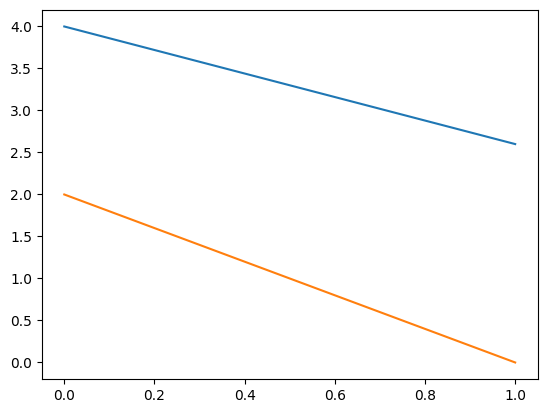

[0, 1]

In [24]:
hn = Hamming_network()

W = np.array([[1, -1, -1], [1, 1, -1]])
p = np.array([-1, -1, -1])
epsilon = 0.7

hn.train(W, p, itmax=500, eps=epsilon)
hn.plot_as()
